In [9]:
# imports
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt

In [2]:
model = SentenceTransformer("Derify/ChemMRL-alpha")
# or can use the model from: https://www.kaggle.com/models/michaelrowen/c/Transformers/default
# model = SentenceTransformer('/Users/shashankkatiyar/Documents/learning_ml/open_polymer_prediction/models/ChemBERTa-77M-MLM')

In [3]:
# checking model on example smile
smile = '*CC(*)c1cc1C(=O)OCCC'
embedding = model.encode(smile)
embedding, embedding.shape

(array([ 0.20602615,  0.35991216, -0.01855928, ...,  0.02303501,
        -0.01935555, -0.06065755], shape=(1024,), dtype=float32),
 (1024,))

In [4]:
# reading data and testing on that
# I just modified this to read the data from just the raw directory.
#df_train = pd.read_csv('../data/raw/neurips-open-polymer-prediction-2025/train.csv')
df_train = pd.read_csv('../data/raw/train.csv')
df_train.head()

,id,SMILES,Tg,FFV,Tc,Density,Rg
0,87817,*CC(*)c1ccccc1C(=O)OCCCCCC,NaN,0.374645,0.205667,NaN,NaN
1,106919,*Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5...,NaN,0.370410,NaN,NaN,NaN
2,388772,*Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C4(c5ccc(Oc6ccc(...,NaN,0.378860,NaN,NaN,NaN
3,519416,*Nc1ccc(-c2c(-c3ccc(C)cc3)c(-c3ccc(C)cc3)c(N*)...,NaN,0.387324,NaN,NaN,NaN
4,539187,*Oc1ccc(OC(=O)c2cc(OCCCCCCCCCOCC3CCCN3c3ccc([N...,NaN,0.355470,NaN,NaN,NaN


In [5]:
train_embeddings = model.encode(list(df_train['SMILES']))
train_embeddings, train_embeddings.shape

(array([[ 0.16197343,  0.4184412 , -0.01957345, ...,  0.02289332,
          0.00264375, -0.05859063],
        [ 0.07025187,  0.4667475 , -0.01955179, ...,  0.01430217,
         -0.01459869, -0.02343692],
        [ 0.01707223,  0.45186925, -0.05582504, ...,  0.0157795 ,
         -0.00538474,  0.00778384],
        ...,
        [ 0.01204877,  0.4880923 , -0.03693477, ...,  0.01504534,
          0.00765461, -0.02693263],
        [ 0.15193036,  0.37696952, -0.07929702, ...,  0.01005439,
          0.01193355, -0.03453616],
        [ 0.11608009,  0.48626283,  0.01539712, ...,  0.02377011,
         -0.01425134, -0.02723431]], shape=(7973, 1024), dtype=float32),
 (7973, 1024))

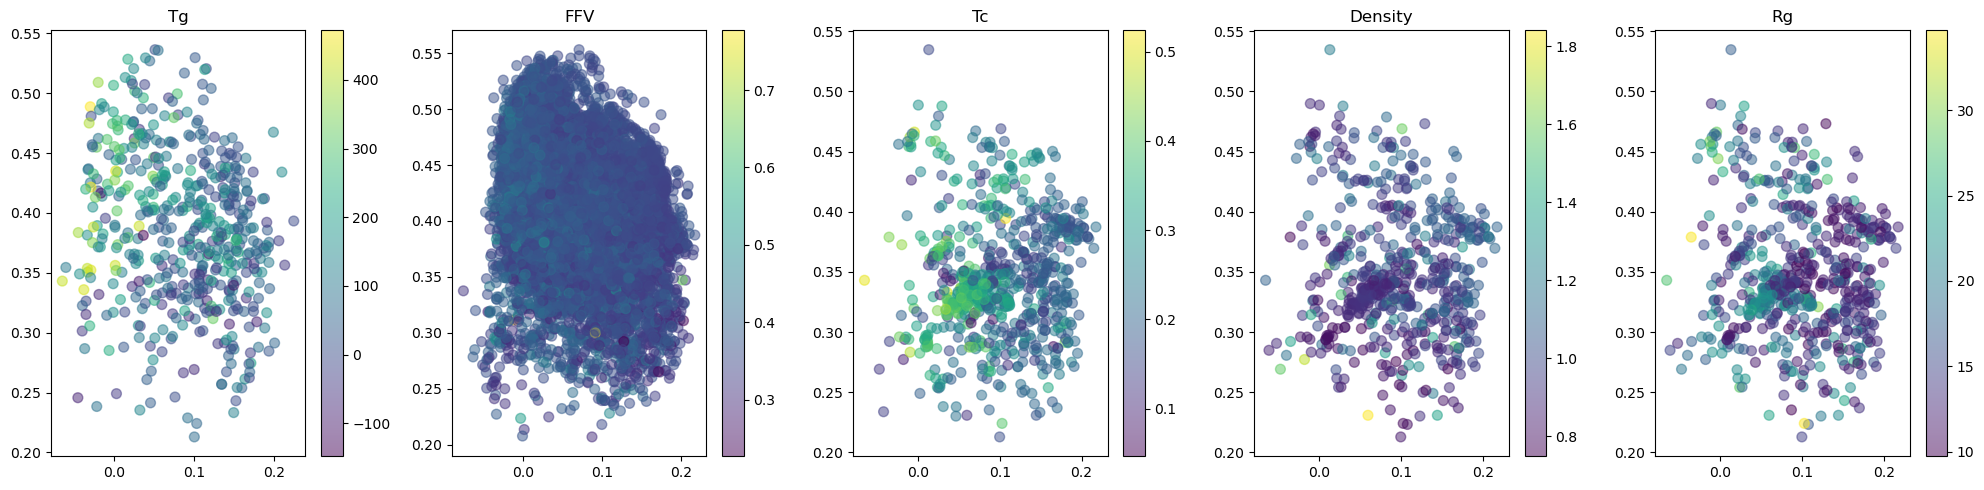

In [ ]:
# Create the UMAPs of the embeddings,
reducer = umap.UMAP(random_state=42)
reducer.fit(train_embeddings)

# Plot the UMAPs of each of these properties
fig, axs = plt.subplots(1,5, figsize=(20, 5))
for idx, i in enumerate(['Tg', 'FFV', 'Tc', 'Density', 'Rg']):
    scatter = axs[idx].scatter(train_embeddings[:, 0], train_embeddings[:, 1], c=df_train[i], cmap='viridis', s=50, alpha=0.5, label=i)
    axs[idx].set_title(i)
    fig.colorbar(scatter, ax=axs[idx])

plt.tight_layout()
plt.show()